<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = 'data/winequality_merged.csv'
wine = pd.read_csv(wine_csv)
wine.head()

# note - quality (score between 0 and 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
# ANSWER
# check shape of data
wine.shape

(6497, 13)

In [4]:
# check shape of data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
# check missing value
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
# check catagories column red_wine
wine.groupby(by=['red_wine'])['red_wine'].count()
# related to red and white vinho verde wine samples : asssume that red =1 and vihno = 0 

red_wine
0    4898
1    1599
Name: red_wine, dtype: int64

In [8]:
wine.groupby(by=['quality'])['quality'].count()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

<AxesSubplot:>

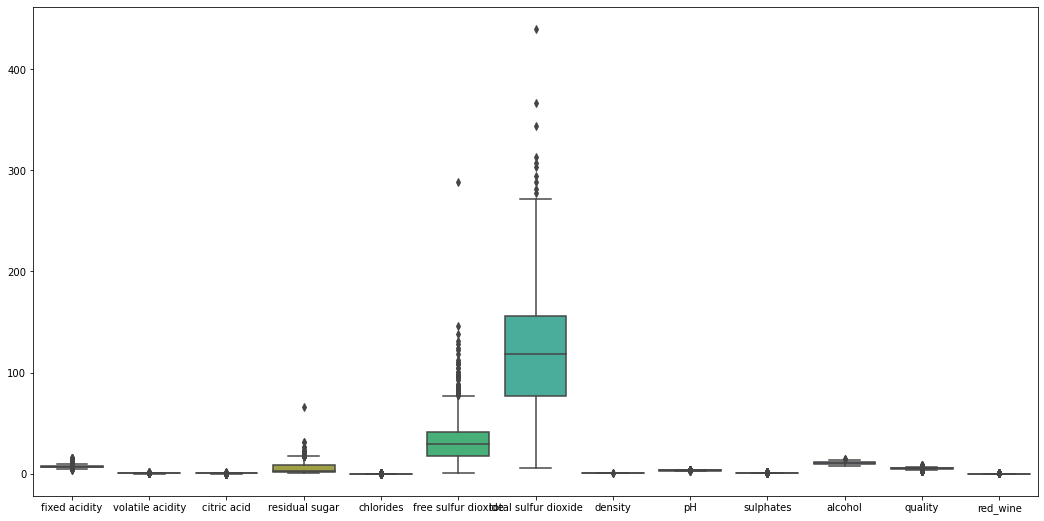

In [9]:
plt.figure(figsize = (18,9))

# plot boxplot to explore all features
sns.boxplot(data = wine)

### Remove outliers 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

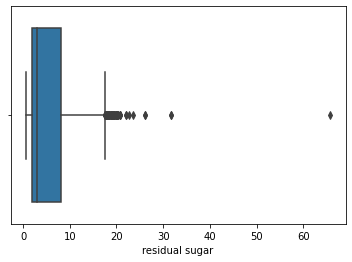

In [10]:
# check outliers in residual sugar
sns.boxplot(wine['residual sugar'])

In [11]:
#  determine upper and lower limit for removing the outliers
lower_limit = wine['residual sugar'].quantile(0.01)
upper_limit = wine['residual sugar'].quantile(0.99)
print(lower_limit)
print(upper_limit)

0.9
18.2


In [12]:
# check how many data is outside the range
outliers = wine[(wine['residual sugar'] > upper_limit) | (wine['residual sugar'] < lower_limit)]
outliers['residual sugar'].count()

97

In [13]:
# replaces 97 outliers with Null
wine['residual sugar'] = np.where(wine['residual sugar'] > upper_limit, np.nan, wine['residual sugar'])
wine['residual sugar'] = np.where(wine['residual sugar'] < lower_limit, np.nan, wine['residual sugar'])

# drop all Null values
wine.dropna(inplace = True)
wine['residual sugar'].isnull().sum()

0

In [14]:
# check how many row left after drop all column above
wine.shape

(6400, 13)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

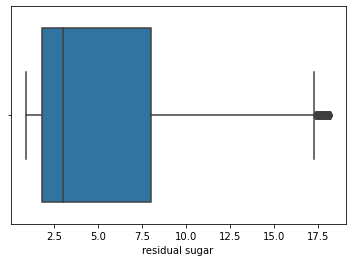

In [15]:
# check boxplot after removed outliers
sns.boxplot(wine['residual sugar'])

In [16]:
# outliers in free sulfur dioxide 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

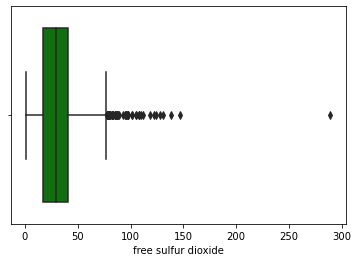

In [17]:
# check outliers in free sulfur dioxide

# name the column
out = wine['free sulfur dioxide']

sns.boxplot(out, color ='green' )

In [18]:
#  determine upper and lower limit for removing the outliers
lower_limit = out.quantile(0.01)
upper_limit = out.quantile(0.99)
print(lower_limit)
print(upper_limit)

4.0
77.0


In [19]:
# check how many data is outside the range
outliers = wine[(out > upper_limit) | (out < lower_limit)]
outliers['free sulfur dioxide'].count()

125

In [20]:
# replaces 125 outliers with Null
wine['free sulfur dioxide'] = np.where(out > upper_limit, np.nan, out)
wine['free sulfur dioxide'] = np.where(out < lower_limit, np.nan, out)

# drop all Null values
wine.dropna(inplace = True)
wine['free sulfur dioxide'].isnull().sum()

0

In [21]:
wine.shape

(6275, 13)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

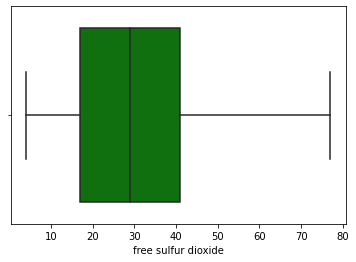

In [22]:
sns.boxplot(out, color ='green' )

In [23]:
# check outliers in total sulfur dioxide 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

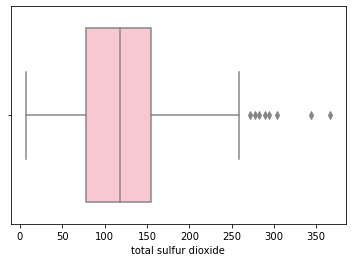

In [24]:
# name the column
out = wine['total sulfur dioxide']

sns.boxplot(out, color ='pink' )

In [25]:
#  determine upper and lower limit for removing the outliers
lower_limit = out.quantile(0.01)
upper_limit = out.quantile(0.99)
print(lower_limit)
print(upper_limit)

12.0
234.0


In [26]:
# check how many data is outside the range
outliers = wine[(out > upper_limit) | (out < lower_limit)]
outliers['total sulfur dioxide'].count()

117

In [27]:
# replaces 117 outliers with Null
wine['total sulfur dioxide'] = np.where(out > upper_limit, np.nan, out)
wine['total sulfur dioxide'] = np.where(out < lower_limit, np.nan, out)

# drop all Null values
wine.dropna(inplace = True)
wine['total sulfur dioxide'].isnull().sum()

0

In [28]:
#check how ,many rows left after drop the null values
wine.shape

(6158, 13)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

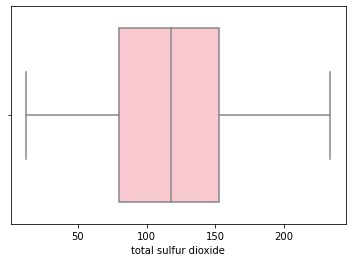

In [29]:
# plot the boxplot after removed outliers
sns.boxplot(out, color ='pink' )

##### check correlation of data

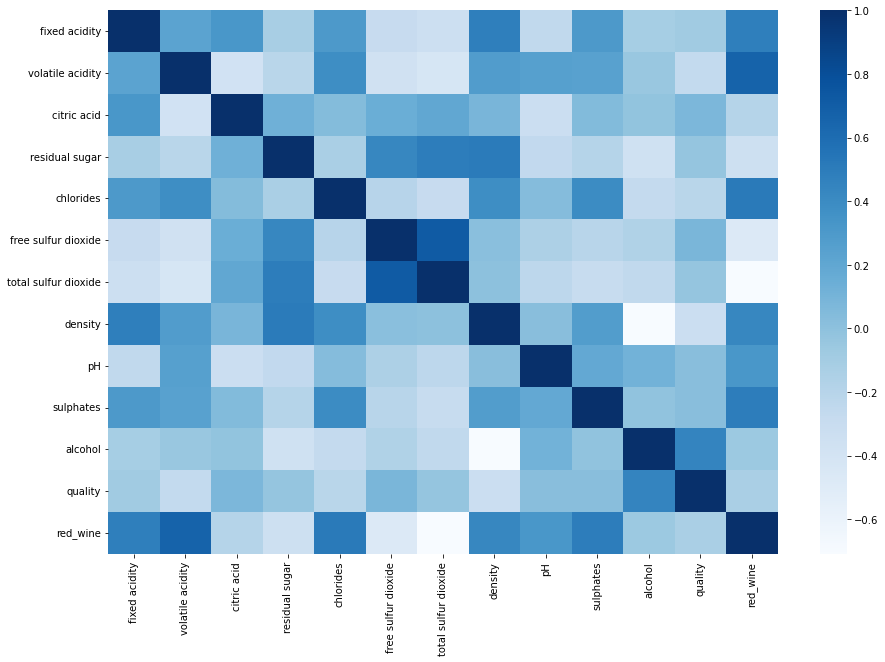

In [30]:
wine_corr = wine.corr()

plt.figure(figsize = (15,10))

sns.heatmap(wine_corr, cmap = 'Blues')

plt.show()

### 2. Set Target Variable

Create a target variable for wine quality.

In [31]:
# Target Variable
# quality (score between 0 and 10)

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [32]:
# ANSWER
# alcohol level 
# free sulfur dioxide
# citric acid
# density - negative correlation

### 4. Using Linear Regression Create a Model and Test Score

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Train-Test Split
# X = wine[['alcohol', 'free sulfur dioxide', 'citric acid', 'density','total sulfur dioxide' ]]
X = wine.drop(columns = ['quality', 'red_wine'], axis = 0)
y = wine[['quality']]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
# Create a model for Linear Regression
regressor = LinearRegression()

# Fit the model with the Training data
regressor.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_train)
print("R^2 = %0.5f" % r2_score(y_train, y_pred))


# Calculate the score (R^2 for Regression) for Testing Data
y_pred = regressor.predict(X_test)
print("R^2 = %0.5f" % r2_score(y_test, y_pred))

R^2 = 0.29137
R^2 = 0.32293


In [37]:
# predict first row of data
regressor.predict([[7.4, 0.7, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])

array([[5.01788796]])

In [38]:
# actual answer
wine.iloc[0]['quality']

5.0

### BONUS: Cross validation

In [39]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [43]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X = wine.drop(columns = ['quality', 'red_wine'], axis = 0)
    y = wine[['quality']]
    
    # Fit model with training set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Make predictions with training and test set
   
    
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores = np.append(train_scores, r2_score(y_train, y_train_pred))
    train_rmse = np.append(train_rmse, mean_squared_error(y_train, y_train_pred))
    test_scores = np.append(test_scores, r2_score(y_test, y_test_pred))
    test_rmse = np.append(test_rmse, mean_squared_error(y_test, y_test_pred))
    
# Create a metrics_df dataframe to display r2 and rmse scores
col_name = ['fold_1' ,'fold_2','fold_3', 'fold_4', 'fold_5' ]
index = ['train_scores', 'train_rmse', 'test_scores', 'test_rmse' ]
data = train_scores, train_rmse, test_scores, test_rmse
metrics_df =pd.DataFrame(data = data, columns = col_name, index = index)
metrics_df


,fold_1,fold_2,fold_3,fold_4,fold_5
train_scores,0.302479,0.302479,0.302479,0.302479,0.302479
train_rmse,0.523183,0.523183,0.523183,0.523183,0.523183
test_scores,0.278357,0.278357,0.278357,0.278357,0.278357
test_rmse,0.550330,0.550330,0.550330,0.550330,0.550330


In [44]:
# Describe the metrics
print('R^2 train:\t %0.3f +/- %0.3f '% (np.mean(train_scores), np.std(train_scores)))
print('RMSE train:\t %0.3f +/- %0.3f '% (np.mean(train_rmse), np.std(train_rmse)))
print('R^2 test:\t %0.3f +/- %0.3f '% (np.mean(test_scores), np.std(test_scores)))
print('RMSE test:\t %0.3f +/- %0.3f '% (np.mean(test_rmse), np.std(test_rmse)))

R^2 train:	 0.302 +/- 0.000 
RMSE train:	 0.523 +/- 0.000 
R^2 test:	 0.278 +/- 0.000 
RMSE test:	 0.550 +/- 0.000 


**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



